In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
path_file = "E:\Project\OOC\LEDs_Data_Processing\Encode_Decode\draw\data\data-Copy.xlsx"
# path_file = "E:\Project\OOC\LEDs_Data_Processing\Encode_Decode\draw\data\data.xlsx"
df = pd.read_excel(path_file)

print(df)

    Distance (m)  Code 1  Code 2  Code 3  Code 4  Bit error rate (%)
0            1.5      90      91      96      91                0.00
1            1.6      81      84      84      81                0.00
2            1.7      71      70      73      71                0.00
3            1.8      62      56      65      54                0.00
4            1.9      61      50      61      55                0.00
5            2.0      44      39      42      39                0.00
6            2.1      38      35      34      35                0.00
7            2.2      30      28      21      22                0.00
8            2.3       0       0       0       0                0.00
9            2.4       0       0       0       0                0.00
10           1.5      99      98      99      97                0.00
11           1.6      98      98      99      97                0.00
12           1.7      99      97      98      93                0.26
13           1.8      96      93  

In [22]:
distance = df.loc[ 0: 10, 'Code 1']
print(distance)

# c1_14khz_accuracy= df.iloc[:10, 1].to_list()
# c1_18khz_accuracy= df.iloc[10:20, 1].to_list()
# c1_20khz_accuracy= df.iloc[20:30, 1].to_list()

# # print(distance)
# c2_14khz_accuracy= df.iloc[:10, 2].to_list()
# c2_18khz_accuracy= df.iloc[10:20, 2].to_list()
# c2_20khz_accuracy= df.iloc[20:30, 2].to_list()


# c3_14khz_accuracy= df.iloc[:10, 3].to_list()
# c3_18khz_accuracy= df.iloc[10:20, 3].to_list()
# c3_20khz_accuracy= df.iloc[20:30, 3].to_list()


# _14khz_ber = df.iloc[:10, 5].to_list()
# _18khz_ber = df.iloc[10:20, 5].to_list()
# _20khz_ber = df.iloc[20:30, 5].to_list()
# print(c3_20khz_accuracy)



0     90
1     81
2     71
3     62
4     61
5     44
6     38
7     30
8      0
9      0
10    99
Name: Code 1, dtype: int64


Draw single led

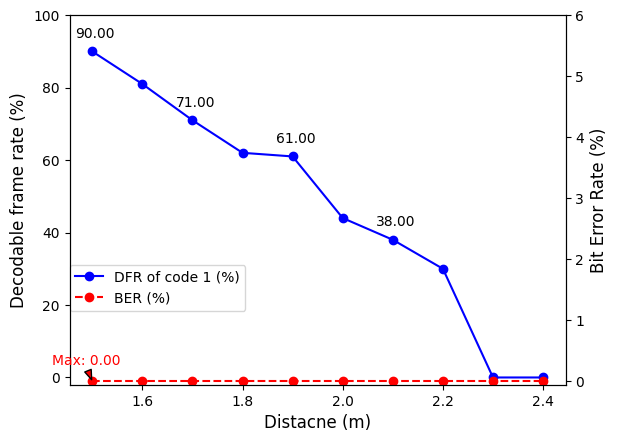

In [256]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Distacne (m)', fontsize=12)
ax1.set_ylabel('Decodable frame rate (%)', color='black', fontsize=12)
# ax1.set_xlim(1.6, 2)
ax1.set_ylim(-2, 100)
line1 =ax1.plot(distance, c1_14khz_accuracy, color='Blue', label='DFR of code 1 (%)', marker = 'o')

ax1.tick_params(axis='y', labelcolor='black')
# ax1.scatter(distance, c1_code1_accuracy, color='blue', edgecolors='blue', s=3)
for i, txt in enumerate(c1_14khz_accuracy):
    if i in [0, 2, 4, 6]:
        ax1.annotate(f'{txt:.2f}', (distance[i], c1_14khz_accuracy[i]), textcoords="offset points", xytext=(2,10), ha='center', color='black', fontsize=10)


ax2 = ax1.twinx()
ax2.set_ylim(-0.06, 6)
ax2.set_ylabel('Bit Error Rate (%)', color='black', fontsize=12)
line3 = ax2.plot(distance, _14khz_ber, color='red', label='BER (%)', linestyle='--', marker = 'o')
ax2.tick_params(axis='y', labelcolor='black')

peak_index = np.argmax(_14khz_ber)  # Chỉ số của điểm cực đại
peak_value = _14khz_ber[peak_index]  # Giá trị của điểm cực đại
peak_distance = distance[peak_index]  # Khoảng cách của điểm cực đại
ax2.annotate(f'Max: {peak_value:.2f}', 
             (peak_distance, peak_value), 
             textcoords="offset points", 
             xytext=(-4,12), 
             ha='center', 
             color='red', 
             fontsize=10, 
             fontweight='normal',
             arrowprops=dict(facecolor='red', edgecolor='black', shrink=0.1, width = 2, headwidth = 5, headlength = 7))



lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc=(0, 0.2))  # Hiển thị hộp chú thích kết hợp trên ax1

plt.savefig('_1led_14khz.png')


Draw two leds

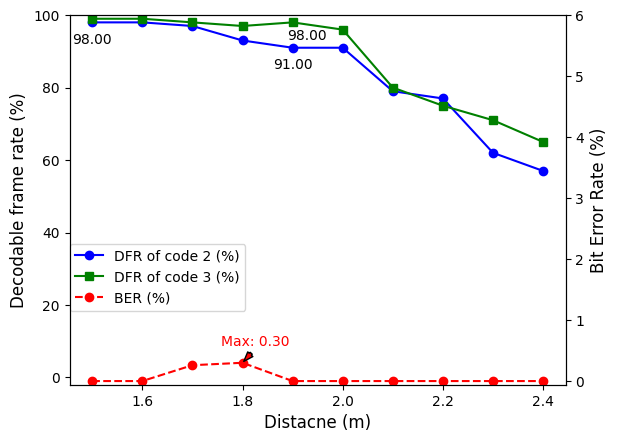

In [276]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Distacne (m)', fontsize=12)
ax1.set_ylabel('Decodable frame rate (%)', color='black', fontsize=12)
# ax1.set_xlim(1.6, 2)
ax1.set_ylim(-2, 100)
line1 =ax1.plot(distance, c2_18khz_accuracy, color='Blue', label='DFR of code 2 (%)', marker = 'o')
line2 =ax1.plot(distance, c3_18khz_accuracy, color='Green', label='DFR of code 3 (%)', marker = 's')
ax1.tick_params(axis='y', labelcolor='black')
# ax1.scatter(distance, c1_code1_accuracy, color='blue', edgecolors='blue', s=3)
for i, txt in enumerate(c2_18khz_accuracy):
    if i in [0, 4]:
        ax1.annotate(f'{txt:.2f}', (distance[i], c2_18khz_accuracy[i]), textcoords="offset points", xytext=(0,-15), ha='center', color='black', fontsize=10)
for i, txt in enumerate(c3_18khz_accuracy):
    if i in [4]:
        ax1.annotate(f'{txt:.2f}', (distance[i], c2_18khz_accuracy[i]), textcoords="offset points", xytext=(10,6), ha='center', color='black', fontsize=10)

ax2 = ax1.twinx()
ax2.set_ylim(-0.06, 6)
ax2.set_ylabel('Bit Error Rate (%)', color='black', fontsize=12)
line3 = ax2.plot(distance, _18khz_ber, color='red', label='BER (%)', linestyle='--', marker = 'o')
ax2.tick_params(axis='y', labelcolor='black')

peak_index = np.argmax(_18khz_ber)  # Chỉ số của điểm cực đại
peak_value = _18khz_ber[peak_index]  # Giá trị của điểm cực đại
peak_distance = distance[peak_index]  # Khoảng cách của điểm cực đại
ax2.annotate(f'Max: {peak_value:.2f}', 
             (peak_distance, peak_value), 
             textcoords="offset points", 
             xytext=(9,12), 
             ha='center', 
             color='red', 
             fontsize=10, 
             fontweight='normal',
             arrowprops=dict(facecolor='red', edgecolor='black', shrink=0.1, width = 2, headwidth = 5, headlength = 7))



lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc=(0, 0.2))  # Hiển thị hộp chú thích kết hợp trên ax1

plt.savefig('_2led_18khz.png')


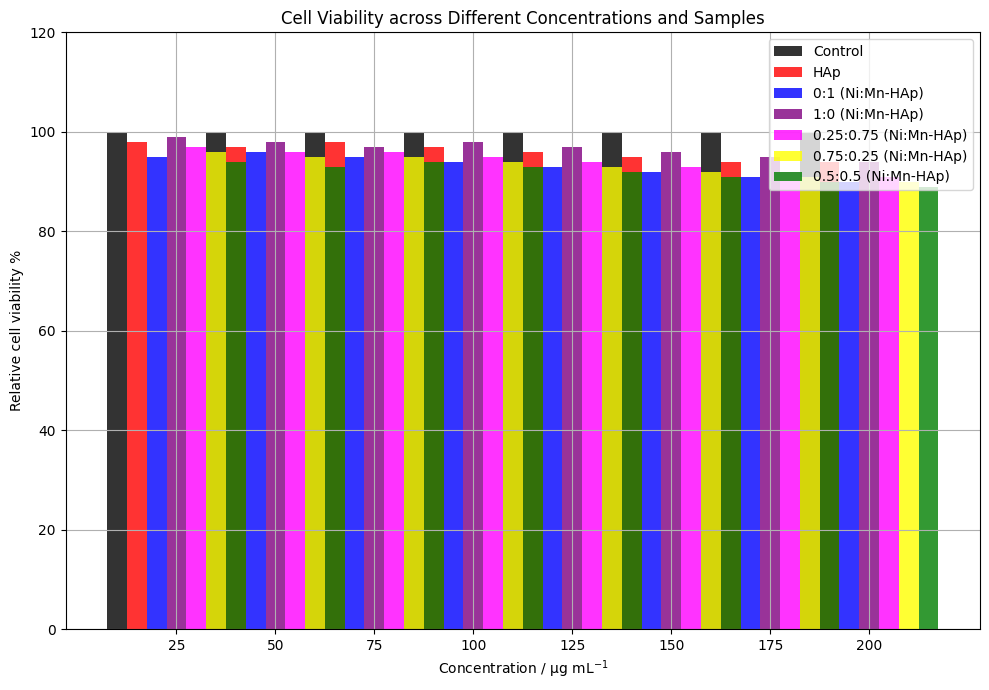

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace these with your actual data)
concentrations = [25, 50, 75, 100, 125, 150, 175, 200]
control = [100, 100, 100, 100, 100, 100, 100, 100]  # Example data
hap = [98, 97, 98, 97, 96, 95, 94, 94]  # Example data
ni_mn_hap_0_1 = [95, 96, 95, 94, 93, 92, 91, 90]  # Example data
ni_mn_hap_1_0 = [99, 98, 97, 98, 97, 96, 95, 94]  # Example data
ni_mn_hap_025_075 = [97, 96, 96, 95, 94, 93, 92, 91]  # Example data
ni_mn_hap_075_025 = [96, 95, 95, 94, 93, 92, 91, 90]  # Example data
ni_mn_hap_05_05 = [94, 93, 94, 93, 92, 91, 90, 89]  # Example data

# Plotting the data
bar_width = 5
opacity = 0.8

plt.figure(figsize=(10, 7))

# Plot each bar for the corresponding data
plt.bar(np.array(concentrations) - 15, control, bar_width, alpha=opacity, color='black', label='Control')
plt.bar(np.array(concentrations) - 10, hap, bar_width, alpha=opacity, color='red', label='HAp')
plt.bar(np.array(concentrations) - 5, ni_mn_hap_0_1, bar_width, alpha=opacity, color='blue', label='0:1 (Ni:Mn-HAp)')
plt.bar(np.array(concentrations), ni_mn_hap_1_0, bar_width, alpha=opacity, color='purple', label='1:0 (Ni:Mn-HAp)')
plt.bar(np.array(concentrations) + 5, ni_mn_hap_025_075, bar_width, alpha=opacity, color='magenta', label='0.25:0.75 (Ni:Mn-HAp)')
plt.bar(np.array(concentrations) + 10, ni_mn_hap_075_025, bar_width, alpha=opacity, color='yellow', label='0.75:0.25 (Ni:Mn-HAp)')
plt.bar(np.array(concentrations) + 15, ni_mn_hap_05_05, bar_width, alpha=opacity, color='green', label='0.5:0.5 (Ni:Mn-HAp)')

plt.xlabel('Concentration / μg mL$^{-1}$')
plt.ylabel('Relative cell viability %')
plt.title('Cell Viability across Different Concentrations and Samples')
plt.xticks(concentrations)
plt.ylim([0, 120])
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()


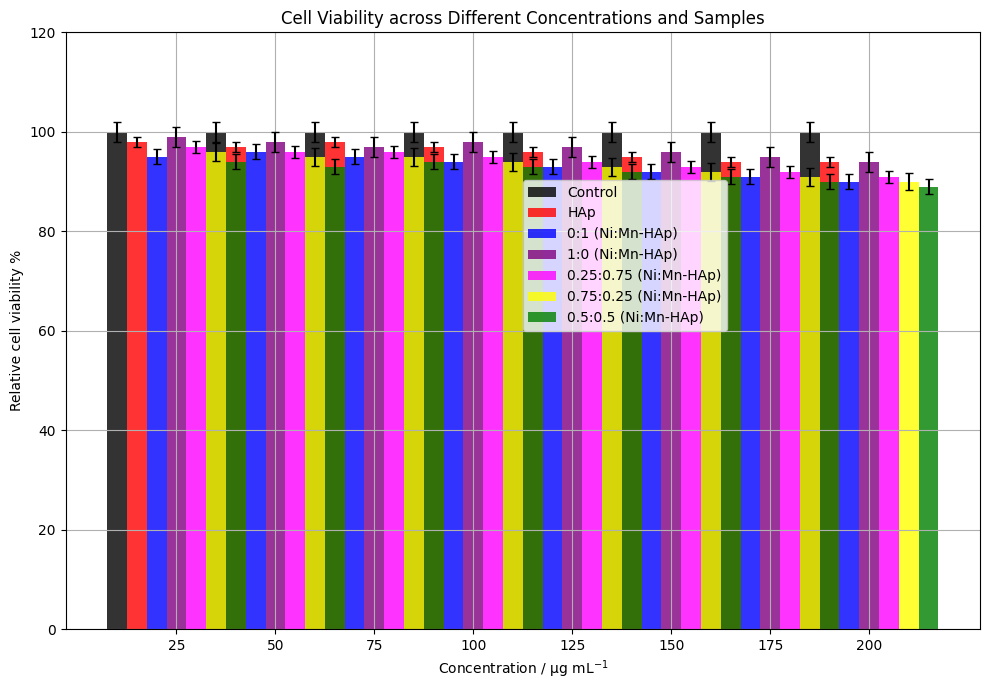

In [4]:

import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace these with your actual data)
concentrations = [25, 50, 75, 100, 125, 150, 175, 200]
control = [100, 100, 100, 100, 100, 100, 100, 100]  # Example data
hap = [98, 97, 98, 97, 96, 95, 94, 94]  # Example data
ni_mn_hap_0_1 = [95, 96, 95, 94, 93, 92, 91, 90]  # Example data
ni_mn_hap_1_0 = [99, 98, 97, 98, 97, 96, 95, 94]  # Example data
ni_mn_hap_025_075 = [97, 96, 96, 95, 94, 93, 92, 91]  # Example data
ni_mn_hap_075_025 = [96, 95, 95, 94, 93, 92, 91, 90]  # Example data
ni_mn_hap_05_05 = [94, 93, 94, 93, 92, 91, 90, 89]  # Example data

# Error values (replace these with your actual error data)
error_control = [2, 2, 2, 2, 2, 2, 2, 2]
error_hap = [1, 1, 1, 1, 1, 1, 1, 1]
error_ni_mn_hap_0_1 = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
error_ni_mn_hap_1_0 = [2, 2, 2, 2, 2, 2, 2, 2]
error_ni_mn_hap_025_075 = [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]
error_ni_mn_hap_075_025 = [1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8]
error_ni_mn_hap_05_05 = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]

# Plotting the data
bar_width = 5
opacity = 0.8

plt.figure(figsize=(10, 7))

# Plot each bar for the corresponding data with error bars
plt.bar(np.array(concentrations) - 15, control, bar_width, alpha=opacity, color='black',
        label='Control', yerr=error_control, capsize=3)
plt.bar(np.array(concentrations) - 10, hap, bar_width, alpha=opacity, color='red',
        label='HAp', yerr=error_hap, capsize=3)
plt.bar(np.array(concentrations) - 5, ni_mn_hap_0_1, bar_width, alpha=opacity, color='blue',
        label='0:1 (Ni:Mn-HAp)', yerr=error_ni_mn_hap_0_1, capsize=3)
plt.bar(np.array(concentrations), ni_mn_hap_1_0, bar_width, alpha=opacity, color='purple',
        label='1:0 (Ni:Mn-HAp)', yerr=error_ni_mn_hap_1_0, capsize=3)
plt.bar(np.array(concentrations) + 5, ni_mn_hap_025_075, bar_width, alpha=opacity, color='magenta',
        label='0.25:0.75 (Ni:Mn-HAp)', yerr=error_ni_mn_hap_025_075, capsize=3)
plt.bar(np.array(concentrations) + 10, ni_mn_hap_075_025, bar_width, alpha=opacity, color='yellow',
        label='0.75:0.25 (Ni:Mn-HAp)', yerr=error_ni_mn_hap_075_025, capsize=3)
plt.bar(np.array(concentrations) + 15, ni_mn_hap_05_05, bar_width, alpha=opacity, color='green',
        label='0.5:0.5 (Ni:Mn-HAp)', yerr=error_ni_mn_hap_05_05, capsize=3)

plt.xlabel('Concentration / μg mL$^{-1}$')
plt.ylabel('Relative cell viability %')
plt.title('Cell Viability across Different Concentrations and Samples')
plt.xticks(concentrations)
plt.ylim([0, 120])
plt.legend(loc=(0.5, 0.5))
plt.grid(True)

plt.tight_layout()
plt.show()


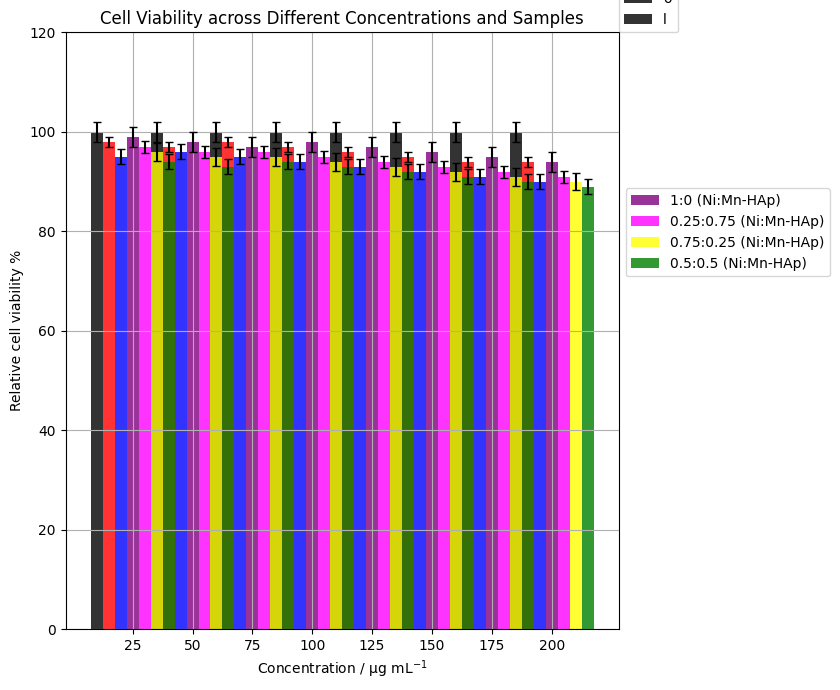

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace these with your actual data)
concentrations = [25, 50, 75, 100, 125, 150, 175, 200]
control = [100, 100, 100, 100, 100, 100, 100, 100]  # Example data
hap = [98, 97, 98, 97, 96, 95, 94, 94]  # Example data
ni_mn_hap_0_1 = [95, 96, 95, 94, 93, 92, 91, 90]  # Example data
ni_mn_hap_1_0 = [99, 98, 97, 98, 97, 96, 95, 94]  # Example data
ni_mn_hap_025_075 = [97, 96, 96, 95, 94, 93, 92, 91]  # Example data
ni_mn_hap_075_025 = [96, 95, 95, 94, 93, 92, 91, 90]  # Example data
ni_mn_hap_05_05 = [94, 93, 94, 93, 92, 91, 90, 89]  # Example data

# Error values (replace these with your actual error data)
error_control = [2, 2, 2, 2, 2, 2, 2, 2]
error_hap = [1, 1, 1, 1, 1, 1, 1, 1]
error_ni_mn_hap_0_1 = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
error_ni_mn_hap_1_0 = [2, 2, 2, 2, 2, 2, 2, 2]
error_ni_mn_hap_025_075 = [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]
error_ni_mn_hap_075_025 = [1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8, 1.8]
error_ni_mn_hap_05_05 = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]

# Plotting the data
bar_width = 5
opacity = 0.8

plt.figure(figsize=(10, 7))

# Plot each bar for the corresponding data with error bars
bar1 = plt.bar(np.array(concentrations) - 15, control, bar_width, alpha=opacity, color='black',
               label='Control', yerr=error_control, capsize=3)
bar2 = plt.bar(np.array(concentrations) - 10, hap, bar_width, alpha=opacity, color='red',
               label='HAp', yerr=error_hap, capsize=3)
bar3 = plt.bar(np.array(concentrations) - 5, ni_mn_hap_0_1, bar_width, alpha=opacity, color='blue',
               label='0:1 (Ni:Mn-HAp)', yerr=error_ni_mn_hap_0_1, capsize=3)
bar4 = plt.bar(np.array(concentrations), ni_mn_hap_1_0, bar_width, alpha=opacity, color='purple',
               label='1:0 (Ni:Mn-HAp)', yerr=error_ni_mn_hap_1_0, capsize=3)
bar5 = plt.bar(np.array(concentrations) + 5, ni_mn_hap_025_075, bar_width, alpha=opacity, color='magenta',
               label='0.25:0.75 (Ni:Mn-HAp)', yerr=error_ni_mn_hap_025_075, capsize=3)
bar6 = plt.bar(np.array(concentrations) + 10, ni_mn_hap_075_025, bar_width, alpha=opacity, color='yellow',
               label='0.75:0.25 (Ni:Mn-HAp)', yerr=error_ni_mn_hap_075_025, capsize=3)
bar7 = plt.bar(np.array(concentrations) + 15, ni_mn_hap_05_05, bar_width, alpha=opacity, color='green',
               label='0.5:0.5 (Ni:Mn-HAp)', yerr=error_ni_mn_hap_05_05, capsize=3)

plt.xlabel('Concentration / μg mL$^{-1}$')
plt.ylabel('Relative cell viability %')
plt.title('Cell Viability across Different Concentrations and Samples')
plt.xticks(concentrations)
plt.ylim([0, 120])
plt.grid(True)

# First legend
first_legend = plt.legend(bar1, 'Control', loc=(0, 0.5), bbox_to_anchor=(1, 1))
second_legend = plt.legend( bar2, 'HAp', loc=(0.2, 0.5), bbox_to_anchor=(1, 1))
thirst_legend = plt.legend( bar3,  '0:1 (Ni:Mn-HAp)', loc=(0.5, ), bbox_to_anchor=(1, 1))
# fouth_legend = plt.legend( bar4, ['Control', 'HAp', '0:1 (Ni:Mn-HAp)'], loc='upper left', bbox_to_anchor=(1, 1))
# fifth_legend = plt.legend( bar5, ['Control', 'HAp', '0:1 (Ni:Mn-HAp)'], loc='upper left', bbox_to_anchor=(1, 1))
# sixth_legend = plt.legend(bar6, ['Control', 'HAp', '0:1 (Ni:Mn-HAp)'], loc='upper left', bbox_to_anchor=(1, 1))

# Add first legend to the plot
plt.gca().add_artist(first_legend)

# Second legend
plt.legend([bar4, bar5, bar6, bar7], ['1:0 (Ni:Mn-HAp)', '0.25:0.75 (Ni:Mn-HAp)', '0.75:0.25 (Ni:Mn-HAp)', '0.5:0.5 (Ni:Mn-HAp)'],
           loc='upper left', bbox_to_anchor=(1, 0.75))

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for legends
plt.show()


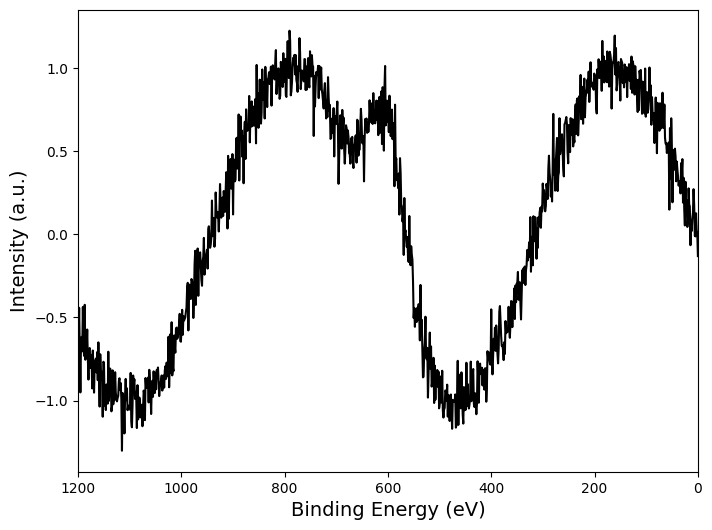

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace these with your actual data)
binding_energy = np.linspace(1200, 0, 1000)  # X-axis values (Binding Energy in eV)
intensity = np.random.normal(size=1000)  # Y-axis values (Intensity)

# Simulate a typical spectrum shape (this is just an example)
intensity = np.sin(binding_energy/100) + np.exp(-((binding_energy - 600)/50)**2) + np.random.normal(0, 0.1, binding_energy.shape)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.plot(binding_energy, intensity, color='black')

# Customizing the plot
plt.xlabel('Binding Energy (eV)', fontsize=14)
plt.ylabel('Intensity (a.u.)', fontsize=14)
plt.xlim(1200, 0)  # Invert x-axis
plt.grid(False)  # Remove the grid if you want to match the style

# Show the plot
plt.show()
